In [1]:
from data_generator import *

DG = DataGenerator('horse2zebra', 256, 256)
a_train, b_train, a_test, b_test = DG.get_dataset()

a_train.shape, b_train.shape, a_test.shape, b_test.shape

((1067, 256, 256, 3),
 (1067, 256, 256, 3),
 (120, 256, 256, 3),
 (120, 256, 256, 3))

In [3]:
from tensorflow_examples.models.pix2pix import pix2pix
gene_ab = pix2pix.unet_generator(3, norm_type='instancenorm')
gene_ba = pix2pix.unet_generator(3, norm_type='instancenorm')

disc_a = pix2pix.discriminator(norm_type='instancenorm', target=False)
disc_b = pix2pix.discriminator(norm_type='instancenorm', target=False)

In [4]:
from cycleGAN import *

model = CycleGAN(gene_ab, gene_ba, disc_a, disc_b, input_shape=(256,256,3), patch_shape=(30,30,1))
model.compile(tf.optimizers.Adam(0.0002, 0.5))

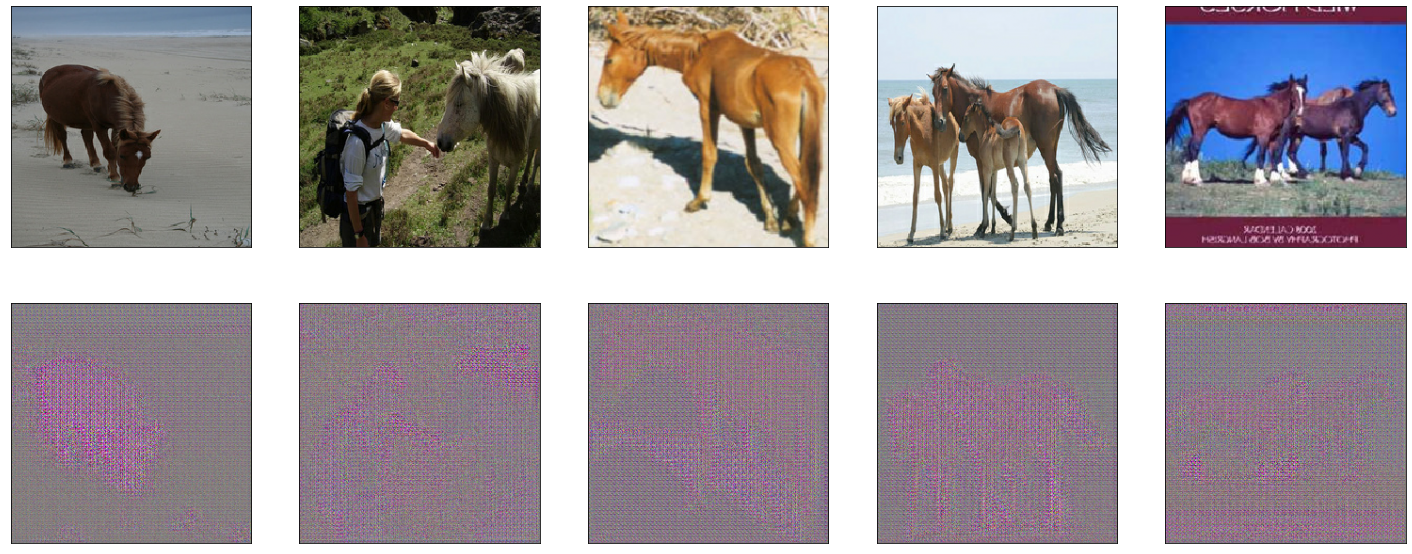

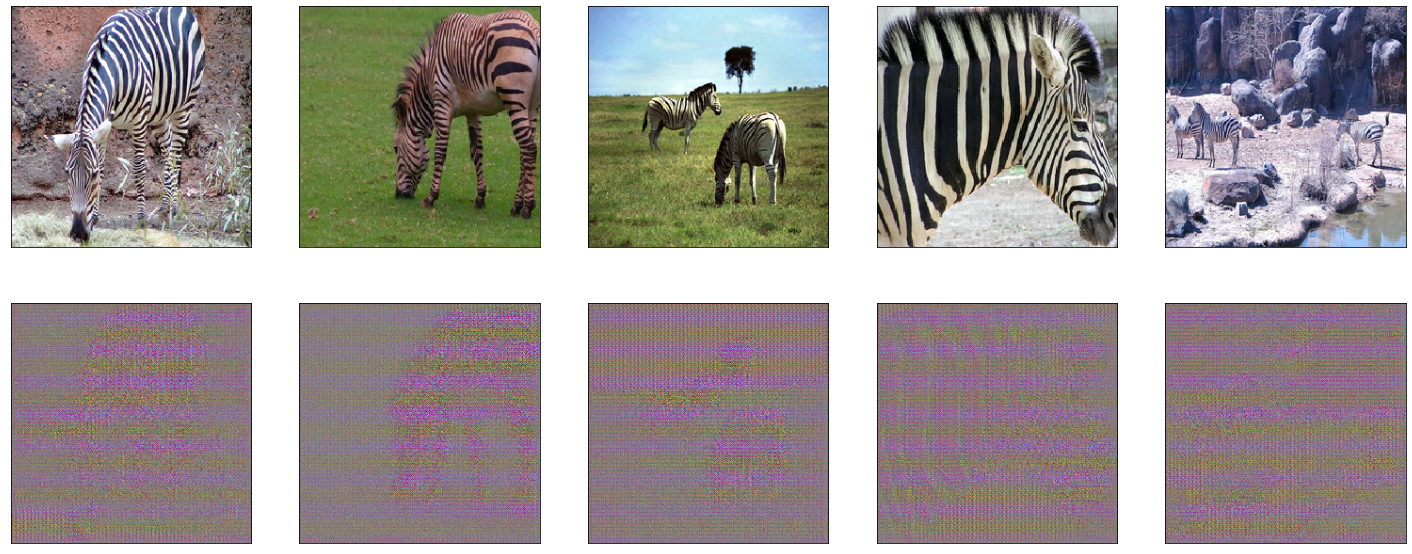

[0.64474791 0.53138889] [4.671828746795654, 0.8951380848884583, 1.0884169340133667, 0.05850563570857048, 0.10384609550237656, 0.04556315392255783, 0.07274313271045685]
* epoch 0/50:  d_loss: 762.711477, g_loss: 4793218.930761, valid_loss: 7025.327336, cycle_loss: 1108.740518, ident_loss: 215.926696


In [ ]:
history = model.fit(a_train, b_train, epochs=50, batch_size=1, img_iter=5, save_path='results/pix2pix_horse2zebra2/')